# Lab 6: Confidence Intervals

Lab Done by: Lexie Peterson  
Partner: Kun Lee

In [1]:
%matplotlib inline
import numpy as np
from numpy import random
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle

In this lab, we will be working with a poisson distribution with a mean of 100. This has been created in the cell below.

In [2]:
background = stats.poisson.rvs(size=1000, mu=100)

## Problem 1

Our first goal is to simply find the signal value on our background distribution that corresponds to the 5σ sensitivity threshold. We can do this by taking the sum of the pmf (discrete probability distribution) until it is equal to the probability of 5σ for a standard normal distribution. The value where this sumation ends is the signal value we are looking for.

In [3]:
five_sigma_prob = stats.norm.cdf(5)
x_thresh = stats.poisson.ppf(five_sigma_prob, 100)
print('5-sigma Threshold:', x_thresh);

5-sigma Threshold: 154.0


## Problem 2

Now, we are going to inject some signals of a single strength into the backgorund distribution. I am going to work with a signal strength of 8σ because I want to work with a strong signal, but a sigma higher than 8 causes some rounding errors in python.

In [4]:
prob_sigma_8 = stats.norm.cdf(8)
signal_8 = stats.poisson.ppf(prob_sigma_8, 100)
print('8-sigma Signal:', signal_8);

8-sigma Signal: 190.0


Using the same method to find a 5σ value in problem one, I found the signal value associated with 8σ to be 190. To inject this value into background, I am going to add 190 to random index values of the background.

In [5]:
np.random.seed(42)

injected_signal = np.zeros(1000)
rand = np.random.randint(0,1000, 50)

for index in range(0,50):
    add = rand[index]
    injected_signal[add] = 190
back_signal = background + injected_signal

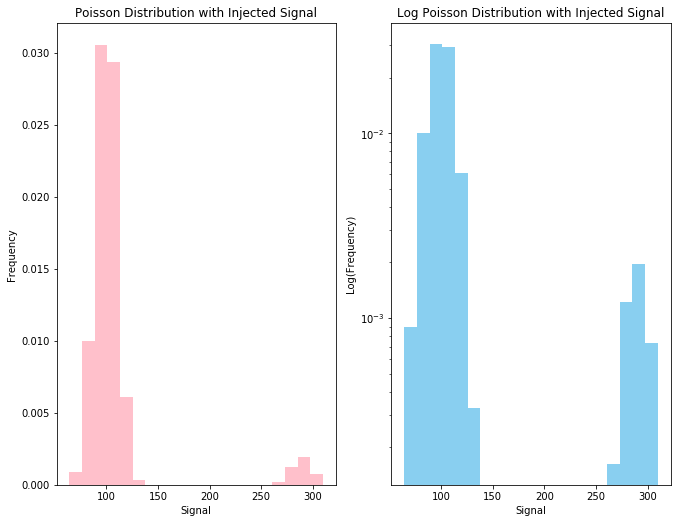

In [7]:
fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(11,8.5) 

ax[0].hist(back_signal, density=True, bins=20, color='pink')
ax[0].set_title('Poisson Distribution with Injected Signal')
ax[0].set_xlabel('Signal')
ax[0].set_ylabel('Frequency')

ax[1].set_yscale('log')
ax[1].set_xlabel('Signal')
ax[1].set_ylabel('Log(Frequency)')
ax[1].set_title('Log Poisson Distribution with Injected Signal')
ax[1].hist(back_signal, density=True, bins=20, color= '#89cff0');


The histograms above are the poisson background distribution with 50 injected signals. The left plot is linear while the right plot is logarithmic (included to show any tail abnormalities that would have been hard to seen in a linear plot). The main shape of this histogram is consitent with any poisson distribution; it almost looks gaussian but is dicrete with asymetric tails that can be seen best in the logarithmic histogram (the right tail dies a little quicker than the left). The secondary distribution (small peaks to the right of the large distribution) is the result of randomly injecting 50 signals with a value of 190. Since we randomly samplied a poisson distribution, the resulting shape of the secondary distribution is a poisson distribution. This is also supported by the asymetric shape of the distribution; the right tail dies faster than the left (similar to the main distibution). Additionally, this secondary distibution is not centered at 190, the value of the injected signal. Instead, it is centered at around 290. This leads me to the conclusion that the observed signal is baised. The observed signal is significantly more likely to be a higher value than the true injected value.

## Problem 3
Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more). 

a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed signal

b) If you choose the same injected signal power as in problem 2, show that you get the same answer.

c) Now reverse the problem, select an observed signal (pick something quite a bit stronger than 5σ) and create a 1D histogram of the injected signal pdf(). Describe the meaning of this histogram.

d) For your observed signal, what is the 1σ uncertainty on the true signal strength?

e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?



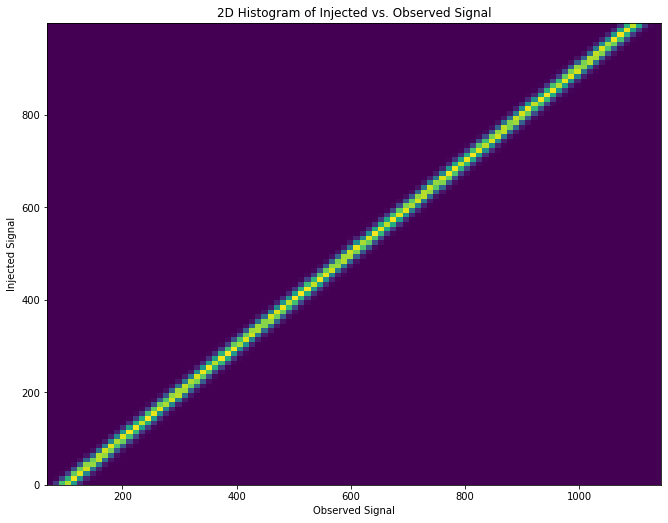

In [25]:
x = []
y = []

for signal in range(0,1000):
    for times in range(1000):
        x.append(stats.poisson.rvs(mu=100) + signal)
        y.append(signal)

fig,ax = plt.subplots(1,1)                    
fig.set_size_inches(11,8.5)

ax.hist2d(x,y, bins=100)
ax.set_xlabel('Observed Signal')
ax.set_ylabel('Injected Signal')
ax.set_title('2D Histogram of Injected vs. Observed Signal');

In [10]:
prob_sigma_7 = stats.norm.cdf(7)
signal_7 = stats.poisson.ppf(prob_sigma_7, 100)
print('7-sigma Signal:', signal_7);

7-sigma Signal: 178.0


In [11]:
y[190000]
x_190 = x[190000:191000]


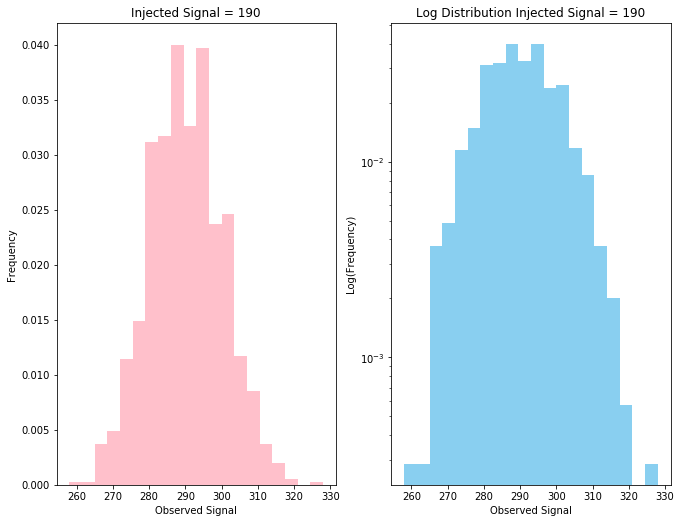

In [13]:
fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(11,8.5) 

ax[0].hist(x_190, density=True, bins=20, color='pink')
ax[0].set_title('Injected Signal = 190')
ax[0].set_xlabel('Observed Signal')
ax[0].set_ylabel('Frequency')

ax[1].set_yscale('log')
ax[1].set_xlabel('Observed Signal')
ax[1].set_ylabel('Log(Frequency)')
ax[1].set_title('Log Distribution Injected Signal = 190')
ax[1].hist(x_190, density=True, bins=20, color= '#89cff0');

In [103]:
arr = np.array(x)
index_x = np.argwhere(arr == 178)

index_y = []
for value in range(0,1005):
    index_value_x = index_x[value]
    index_value_y = y[index_value_x[0]]
    index_y.append(index_value_y)
    

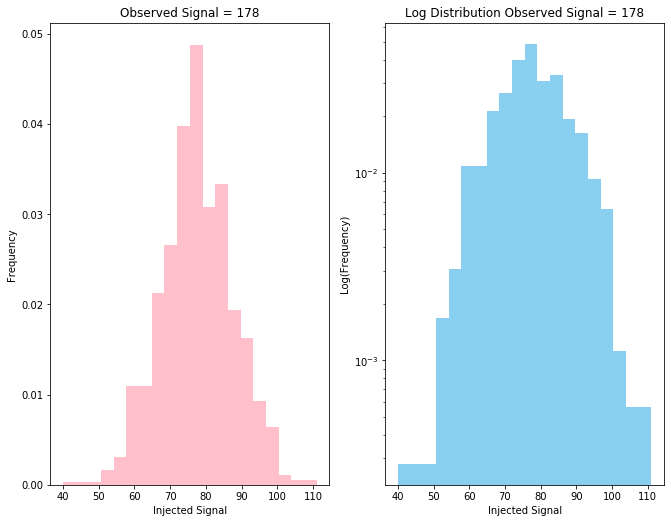

In [105]:
fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(11,8.5) 

ax[0].hist(index_y, density=True, bins=20, color='pink')
ax[0].set_title('Observed Signal = 178')
ax[0].set_xlabel('Injected Signal')
ax[0].set_ylabel('Frequency')

ax[1].set_yscale('log')
ax[1].set_xlabel('Injected Signal')
ax[1].set_ylabel('Log(Frequency)')
ax[1].set_title('Log Distribution Observed Signal = 178')
ax[1].hist(index_y, density=True, bins=20, color= '#89cff0');

## Problem 4
Using the same setup as in problem 3, now pick a relatively weak signal (say in the 1σ range, exact strength not important).

a) Repeat problem 3c, calculating the injected signal pdf(). One of the differences you should immediately see is that the pdf() extends to zero.

b) Describe what it means to have the true signal pdf() extend to zero.

c) Calculate a 95% confidence upper bound. [Hints: make sure your pdf() is normalized. The statistical question is:  if I observe this candidate signal (and it is too weak to claim a detection), then the true signal would be less than X 95% of the time.]

In [82]:
prob_sigma_1 = stats.norm.cdf(1)
signal = stats.poisson.ppf(prob_sigma_1, 100)
print('1-sigma Signal:', signal);

1-sigma Signal: 110.0
